# <p><center style="font-family:newtimeroman;font-size:180%;">Visualize Mnist Using CAE</center></p>
### Table of contents:

* [Import Libraries](#1)
* [Read Data](#2)
* [Visualization Of Dataset](#3)
* [Train Auto Encoder Model](#5)
* [Evaluate The Model](#6)

**<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from skimage.metrics import peak_signal_noise_ratio
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
# Load mnist dataset
(X_train,train_label), (X_test,test_label) = keras.datasets.mnist.load_data()
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape is  (60000, 28, 28)
X_test shape is  (10000, 28, 28)


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (60000, 28, 28)
X_test shape is  (10000, 28, 28)


In [5]:
X_train= np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (60000, 28, 28, 1)
X_test shape is  (10000, 28, 28, 1)


**<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization of Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

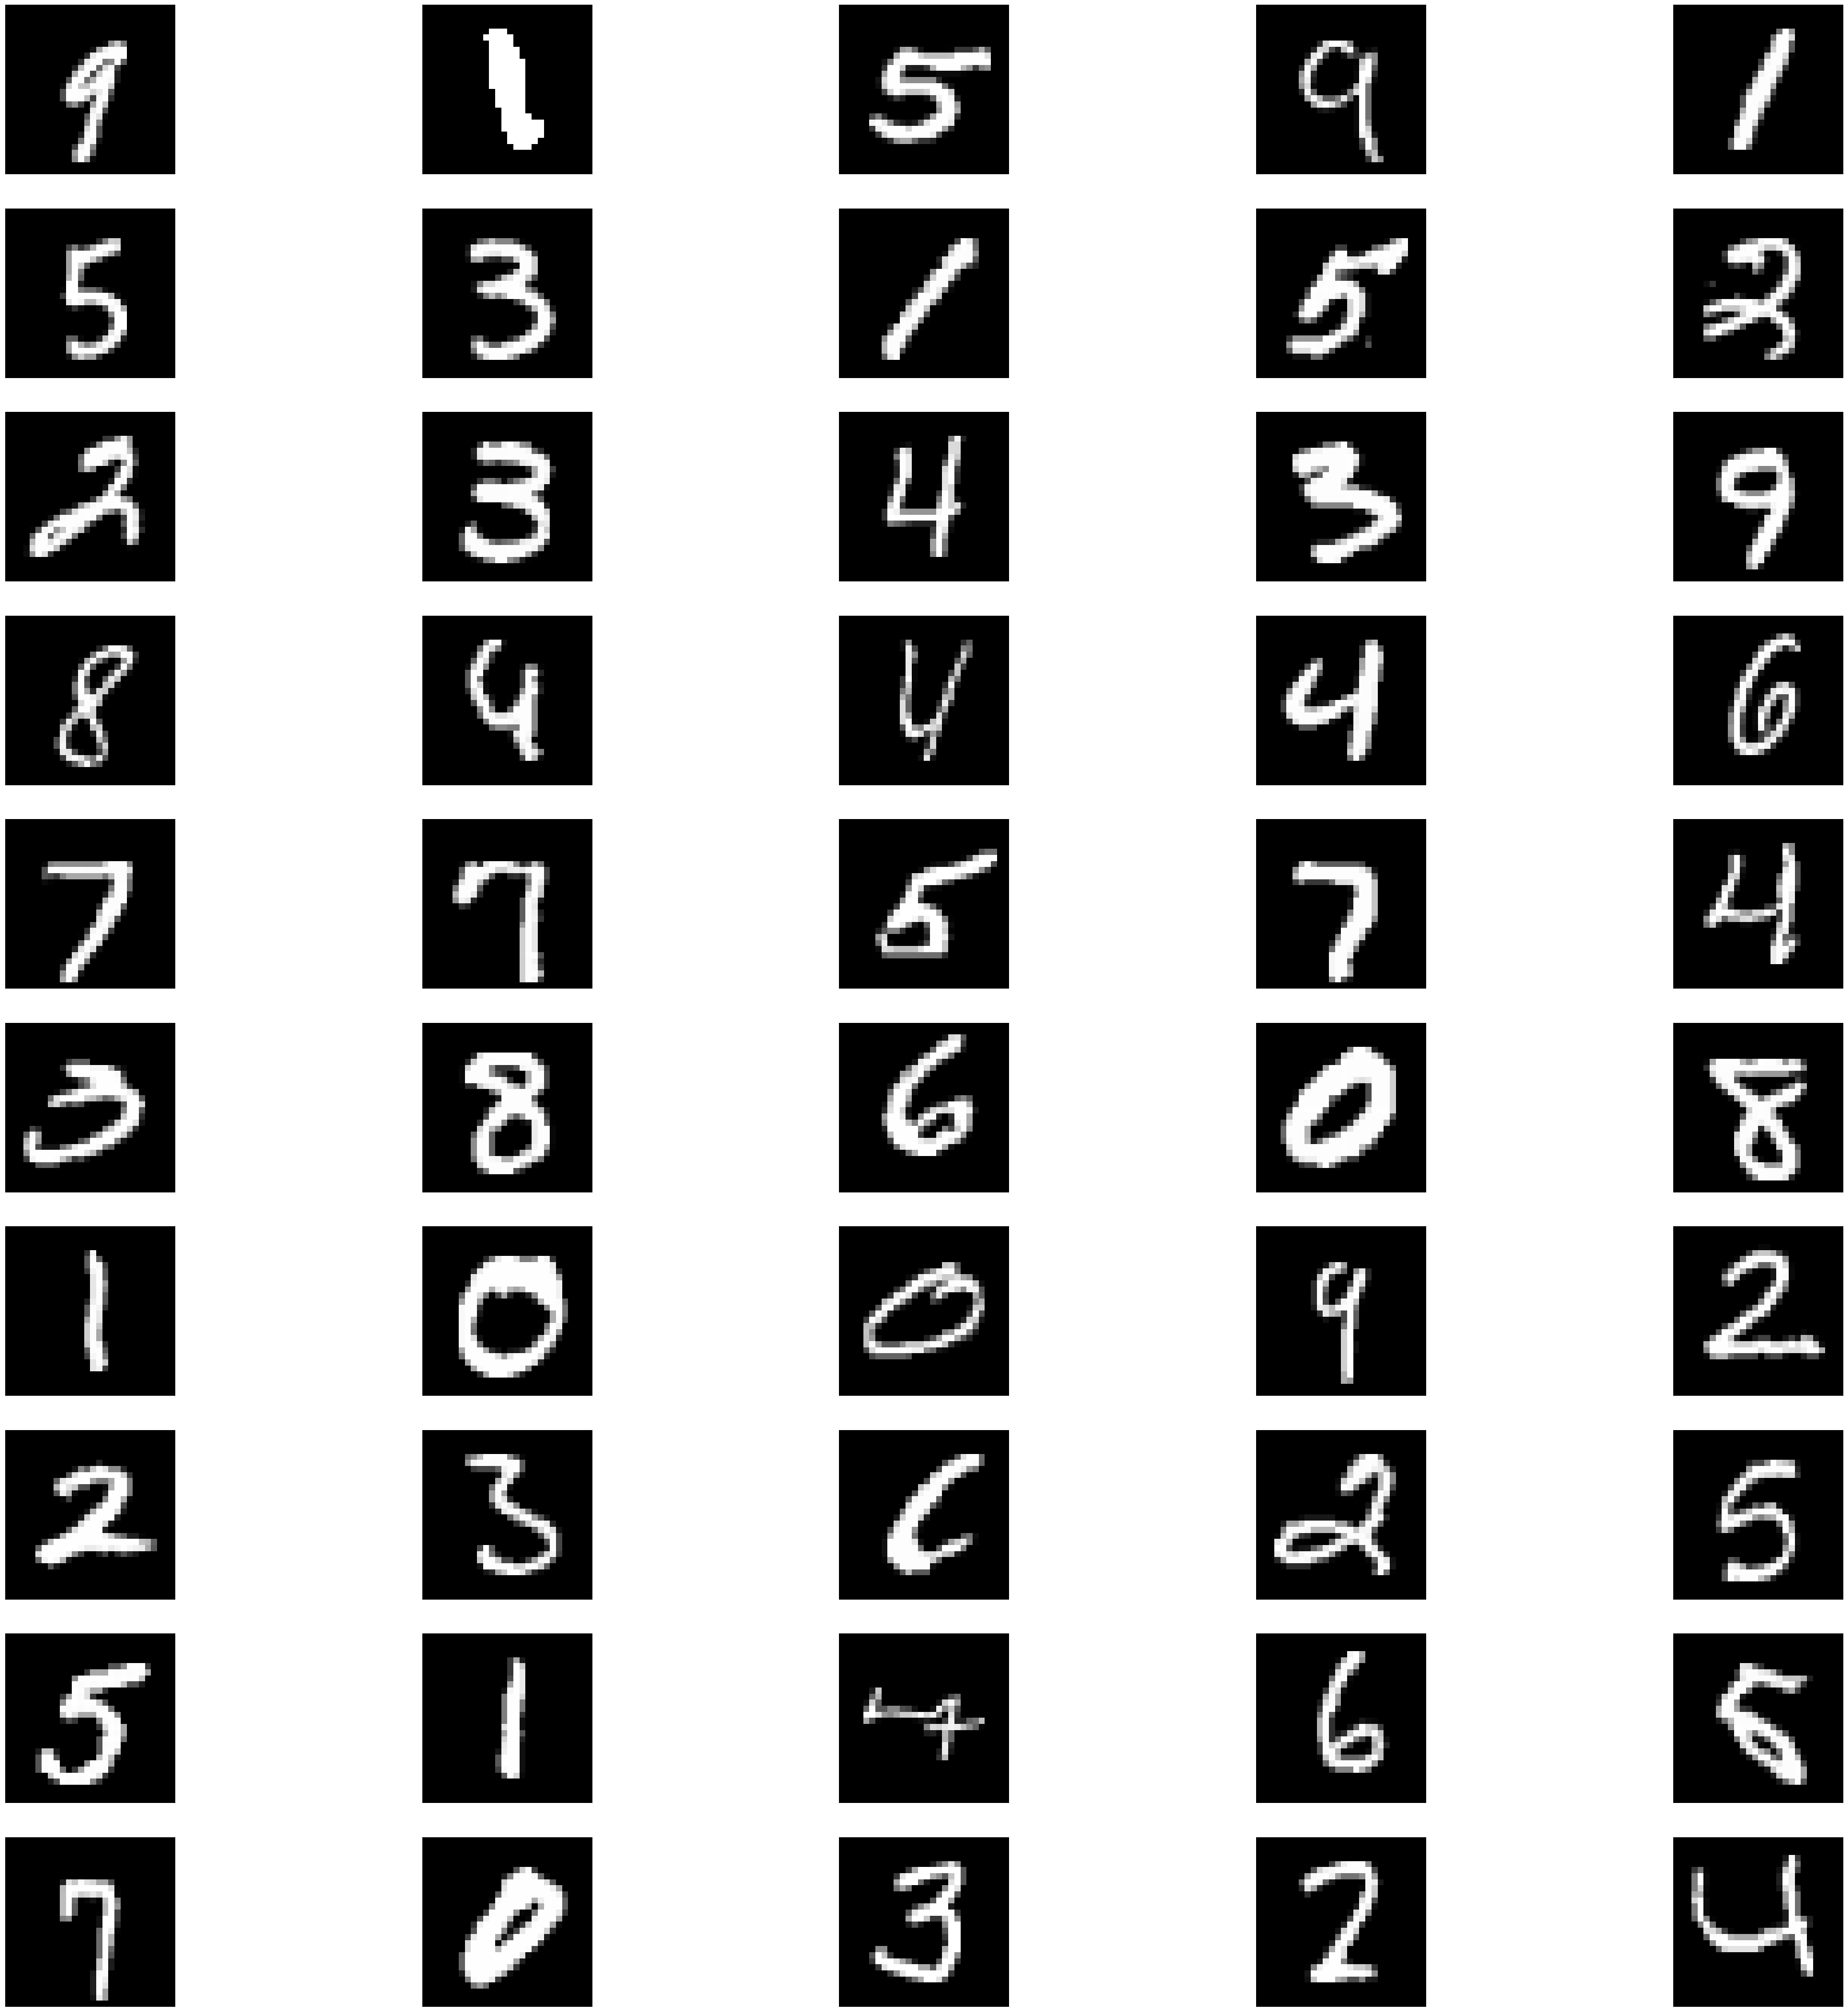

In [6]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(X_train),50)):
    plt.subplot(10,5,n+1)
    plt.imshow(X_train[i],'gray')
    plt.axis('off')

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Modeling </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [7]:
# Input layer with shape (28,28, 1)
input_ = keras.layers.Input(shape=(28,28, 1))
# Encoder
x = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input_)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
encoder = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
#bottelneck
x=keras.layers.Flatten()(encoder)
bottel=keras.layers.Dense(2)(x)
bottleneck_model = keras.models.Model(inputs=input_, outputs=bottel)
#dcoder
x=keras.layers.Dense(49)(bottel)
reshaped_bottleneck = keras.layers.Reshape((7,7,1))(x)
x=keras.layers.Conv2D(32,(3, 3), padding='same', activation='relu')(reshaped_bottleneck)
x=keras.layers.UpSampling2D((2,2))(x)
x=keras.layers.Conv2D(32,(3, 3), padding='same', activation='relu')(x)
x=keras.layers.UpSampling2D((2,2))(x)
dcoder=keras.layers.Conv2D(1,(3, 3), padding='same', activation='sigmoid')(x)
# Autoencoder model
autoencoder = keras.models.Model(inputs=input_, outputs=dcoder)
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0   

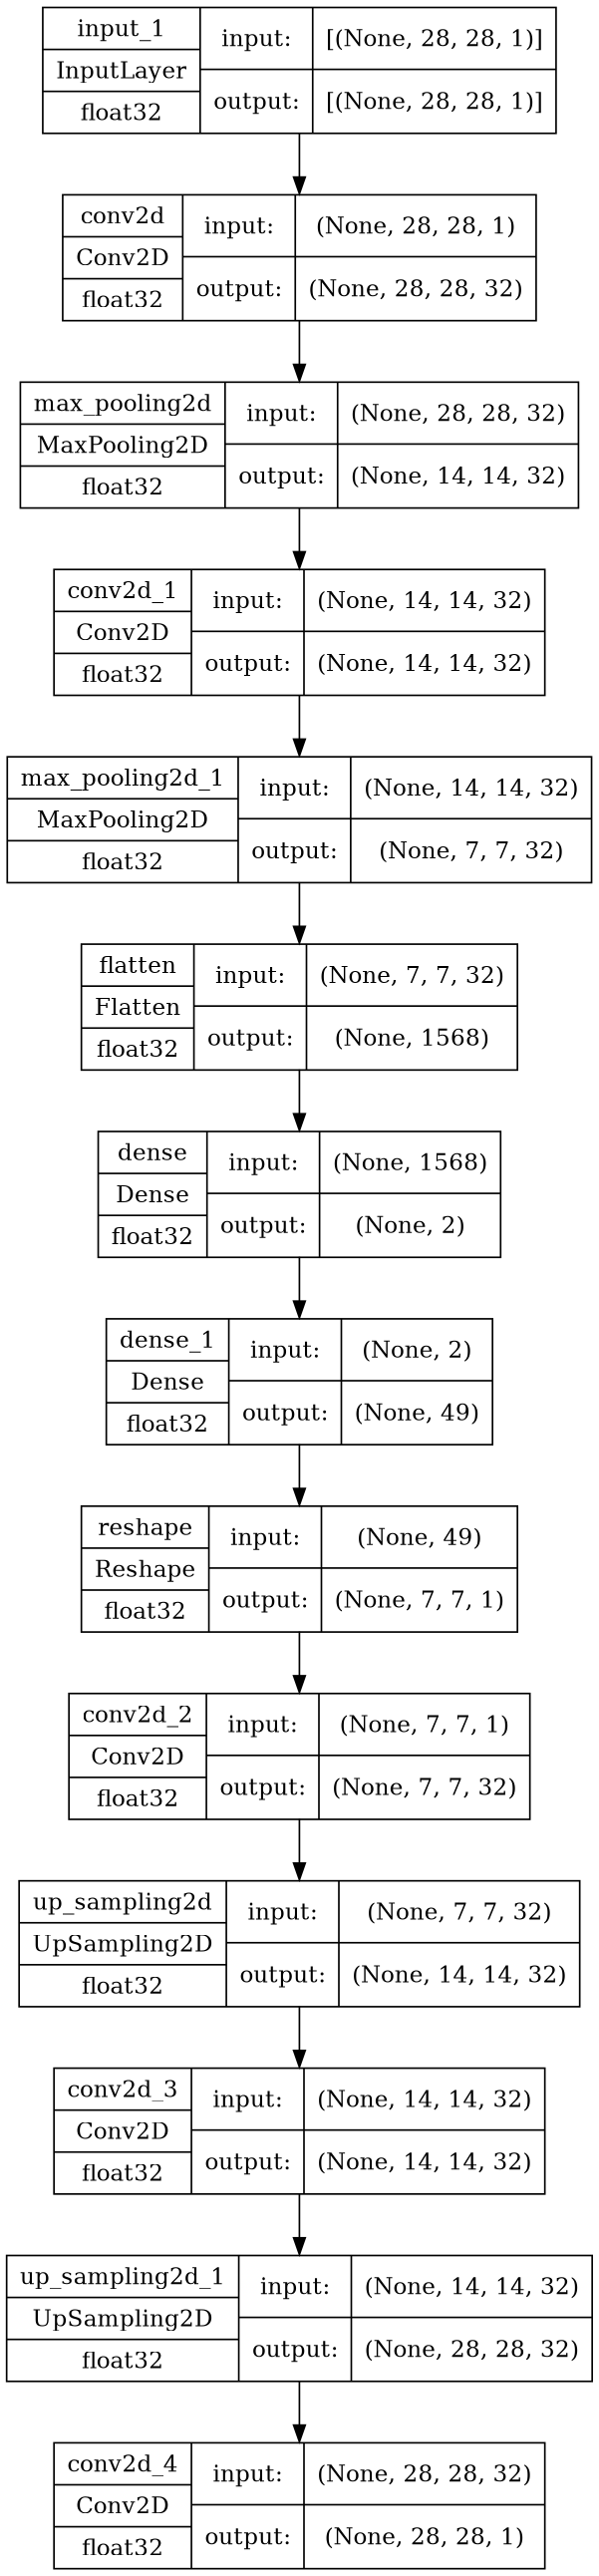

In [8]:
tf.keras.utils.plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [9]:
checkpoint_cb =ModelCheckpoint("autoencoder.h5",save_best_only=True)
autoencoder.compile(optimizer ='adam', loss='mse')
hist=autoencoder.fit(X_train,X_train,epochs=50,validation_data=(X_test,X_test),callbacks=[checkpoint_cb])

Epoch 1/50
1875/1875 [==============================] - 20s 5ms/step - loss: 0.1127 - val_loss: 0.1140
Epoch 2/50
  27/1875 [..............................] - ETA: 7s - loss: 0.1121

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0575 - val_loss: 0.0496
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0486 - val_loss: 0.0472
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0470 - val_loss: 0.0470
Epoch 11/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461 - val_lo

<a id="6"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [10]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,val_loss
0,0.112719,0.113958
1,0.112003,0.113958
2,0.112003,0.113958
3,0.112003,0.113958
4,0.112002,0.113958
5,0.112003,0.113958
6,0.112003,0.113958
7,0.057505,0.049649
8,0.048559,0.047235
9,0.046973,0.047005


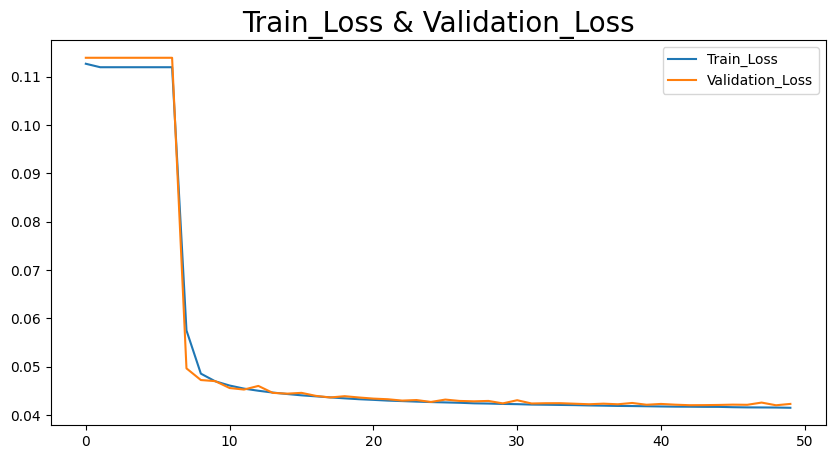

In [11]:
plt.figure(figsize=(10,5))
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.show()

In [12]:
autoencoder.evaluate(X_test,X_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0423


0.0422896109521389

In [13]:
predictions = autoencoder.predict(X_test)
predictions.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28, 1)

In [14]:
psnr_values=[abs(peak_signal_noise_ratio(color,pred,data_range=color.max()-pred.min())) 
             for color,pred in zip(X_test,predictions)]
print('Average PSNR =',np.mean(psnr_values))

Average PSNR = 14.379735171765246


In [15]:
X_test_reduction=bottleneck_model.predict(X_test)
X_train_reduction=bottleneck_model.predict(X_train)
X_test_reduction

1875/1875 [==============================] - 3s 1ms/step


array([[-8.960853  ,  3.104228  ],
       [-2.524007  , -0.04488662],
       [-1.0292177 ,  8.744323  ],
       ...,
       [-8.348462  ,  4.980513  ],
       [-2.6068227 ,  2.4814403 ],
       [-2.3947706 , -1.8938587 ]], dtype=float32)

In [16]:
fig=px.scatter(x=X_train_reduction[:,0],y=X_train_reduction[:,1],color=train_label)
fig.show()

In [17]:
fig=px.scatter(x=X_test_reduction[:,0],y=X_test_reduction[:,1],color=test_label)
fig.show()